# Spambase Classification
Using Random Forest,XGBoost and KNN Classification Models to distinguish the emails into SPAM or HAM(NOT SPAM).
The Spambase dataset available from the UCI Machine Learning Repository:
http://archive.ics.uci.edu/ml/datasets/Spambase

@author: Tirth Patel (MS in Applied Data Science-USC, Spring2021)

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Reading the Spambase dataset 
data_path="/Users/macbook/Desktop/Spambase/spambase.data"
spam_data=pd.read_csv(data_path,sep = ',',header= None)

# Data Exploration

In [2]:
#Information about the Spam Dataset Columns and its Data Type.
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [3]:
#Listing the columns of Spam Dataset
spam_data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

In [4]:
#Description of the Dataset
spam_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [5]:
#Printing the number of Rows and Columns in 'spam_data'
spam_data.shape

(4601, 58)

# Data Preprocessing

Here, I need to assign the column names from 'spambase.names' file to our dataset.

In [6]:
#To assign the names of columns from 'spambase.names' to 'spam_data'
spam_name=["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]

In [7]:
#Reading the'spam_data' with reassigned names of columns
spam_data=pd.read_csv(data_path,sep = ',',header= None, names=spam_name)

<AxesSubplot:xlabel='spam', ylabel='count'>

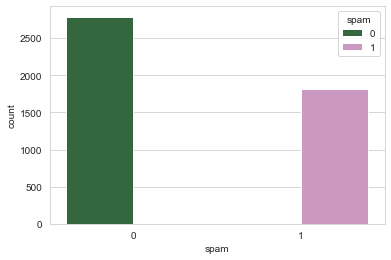

In [8]:
#Plotting the Count Plot to visualize the number of Spam/No Spam emails
sns.set_style('whitegrid')
sns.countplot(x='spam',hue='spam',data=spam_data,palette='cubehelix')

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

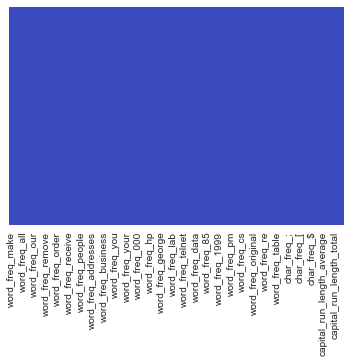

In [9]:
#Plotting the Heat Map to visualize the null values if present in the dataset.
sns.heatmap(spam_data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

#Printing the total number of null values in individual columns
spam_data.isnull().sum()

# Outlier Detection and Outlier Removal
I Tried Removing the Outliers using Inter-Quartile Range(IQR [0.5,0.95]), but it rigorosuly removed around 40% of data
Hence, Lets Try Manual Method to remove Outliers in some important features.

In [10]:
#Creating the copy of the data before removing the outliers.
spam_data_copy=spam_data.copy()

<AxesSubplot:ylabel='capital_run_length_total'>

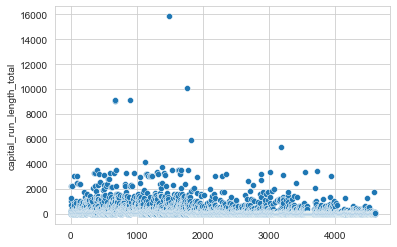

In [11]:
#Outlier Detection by Visualizing the Scatter Plot for 'capital_run_length_total'
sns.scatterplot(data = spam_data['capital_run_length_total'])

In [12]:
#By Visualizing the Scatter Plot we can set the Value Boundaries to remove the outliers.
#For capital_run_length_total we can set the upper boundary to 4000
spam_data=spam_data[(spam_data.capital_run_length_total < 4000)]

<AxesSubplot:ylabel='capital_run_length_average'>

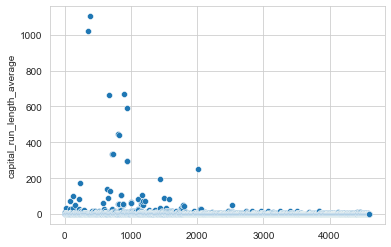

In [13]:
#Outlier Detection by Visualizing the Scatter Plot for 'capital_run_length_average'
sns.scatterplot(data = spam_data['capital_run_length_average'])

In [14]:
#For capital_run_length_total we can set the upper boundary to 200
spam_data=spam_data[(spam_data.capital_run_length_average < 200)]

<AxesSubplot:ylabel='capital_run_length_longest'>

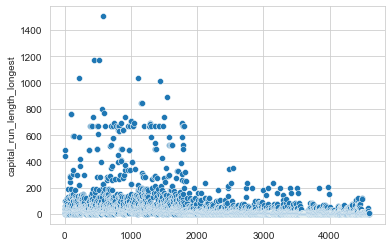

In [15]:
#Outlier Detection by Visualizing the Scatter Plot for 'capital_run_length_longest'
sns.scatterplot(data = spam_data['capital_run_length_longest'])

In [16]:
#For capital_run_length_total we can set the upper boundary to 2000
spam_data=spam_data[(spam_data.capital_run_length_longest < 2000)]

In [17]:
#Shape of the Dataset after removing Outliers.
spam_data.shape

(4581, 58)

In [18]:
#Findind the Coorelation of each features. 
#So that we can drop the one of two features which are highly correlated later in the Data Preprocessing Step 
correlation= spam_data.corr()
#correlation

In [19]:
#Printing the columns which has correlation more than 70%
rel = ~(correlation.mask(np.eye(len(correlation), dtype=bool)).abs() > 0.7).any()
rel

word_freq_make                 True
word_freq_address              True
word_freq_all                  True
word_freq_3d                   True
word_freq_our                  True
word_freq_over                 True
word_freq_remove               True
word_freq_internet             True
word_freq_order                True
word_freq_mail                 True
word_freq_receive              True
word_freq_will                 True
word_freq_people               True
word_freq_report               True
word_freq_addresses            True
word_freq_free                 True
word_freq_business             True
word_freq_email                True
word_freq_you                  True
word_freq_credit               True
word_freq_your                 True
word_freq_font                 True
word_freq_000                  True
word_freq_money                True
word_freq_hp                   True
word_freq_hpl                  True
word_freq_george               True
word_freq_650               

In [20]:
#Comparing the correlation between features and remove one of two features that have a correlation higher than 0.7
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i,j] > 0.7:
            if columns[j]:
                columns[j] = False
final_columns = spam_data.columns[columns]
spam_data = spam_data[final_columns]

In [21]:
#Shape of the Dataset after removing Highly Correlated Columns.
spam_data.shape

(4581, 54)

By looking at the Boolean(False) Output of Coorelation Threshold, this function removed total 4 features like "word_freq_857","word_freq_415","word_freq_technology","word_freq_direct" from those who have correlation higher than 0.7.

In [22]:
spam_data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_data', 'word_freq_85', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_

# Data Transformation
I have used the Quantile Transformer Scaler to converts the variable distribution to a normal distribution. and scales it accordingly. Since it makes the variable normally distributed, it also deals with the outliers.

In [23]:
#Applying Quantile Transformation to the columns "capital_run_length_average","capital_run_length_longest","capital_run_length_total"
#Because the values of these columns were not in the range of 0-1 as others.

col_names = ['capital_run_length_average', 'capital_run_length_longest','capital_run_length_total']
features = spam_data[col_names]

In [24]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

spam_data[col_names] = scaler.fit_transform(features.values)
spam_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,0.757516,0.833333,0.759949,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,0.858859,0.904011,0.937938,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,0.961152,0.979897,0.985577,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,0.732517,0.739239,0.689690,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,0.732517,0.739239,0.689690,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,0.098599,0.115616,0.480981,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,0.241241,0.157658,0.129129,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,0.180828,0.248749,0.561562,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,0.100411,0.208208,0.444444,0


# Feature Selection


In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

#Splitting the columns into Training Columns for Feature Selection
training_cols=spam_data.columns.tolist()[0:53]

def select_features(X_train, y_train):
    best_feature = SelectKBest(score_func=mutual_info_regression, k='all')
    best_feature.fit(X_train, y_train)
    return best_feature

In [26]:
#Selecting the Best Features used for classifying the 'Spam'
features= select_features(spam_data[training_cols],spam_data['spam'])

In [27]:
print(features)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x11f7b29d0>)


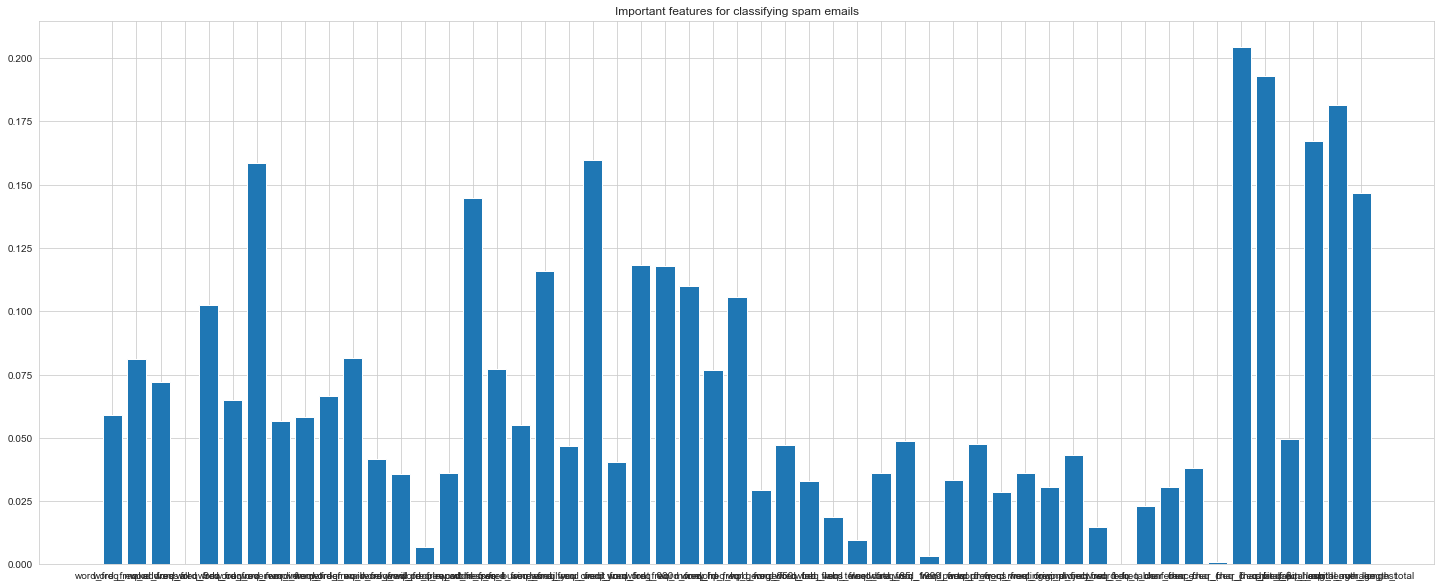

In [28]:
#Visualizing the importance of Features in classifying the Spam 

plt.figure(figsize=(25, 10))
plt.bar([i for i in training_cols], features.scores_)
plt.title("Important features for classifying spam emails")
plt.show()

Using this Plot we can drop some features which has less importance in classifying the spam email. But, First lets include all the Features as Independent Variable and then based on accuracy criteria, we can do try and error by including only the Important features in Model.

# Model Selection

In [29]:
#Splitting the dataset into Dependent and Independent Variables
y = spam_data['spam']
X = pd.DataFrame(spam_data,  columns=spam_data.drop(['spam'],axis=1).columns)

In [30]:
#Creating a function to calculate the Accuracy Score of the Model
def getscore(model,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)

Here, we are using K-Fold Cross Validation Method to Uniformly Separate the Data into Train and Test Dataset using 5 Folds.

In [31]:
#Using K-fold Cross validation to split the data into Train and Test Data
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

In [32]:
#Here, We will use 3 different models to Evaluate their performance on email spam classification set.

from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1000,criterion='gini',max_depth=20,min_samples_split=2,random_state=2)
RF=[]    #Array for Storing the Score of Random Forest Classifier model of 5 folds

from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='uniform')
KNN=[]   #Array for Storing the Score of KNeighbors Classifier model of 5 folds

from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(learning_rate=0.01, max_depth=20, n_estimators=1000, subsample=0.5)
XGB=[]   #Array for Storing the Score of Gradient Boosting Classifier model of 5 folds

Foldresult=[]    #For Storing All the result per fold
Accuracy=[]      #For Storing the accuracy per fold
Error=[]         #For Storing the error per fold


In [33]:
#Fitting the Training and Testing Dataset into our models.
from sklearn.metrics import confusion_matrix

for train,test in kf.split(X):
    X_train, X_test, y_train, y_test= X.iloc[train],X.iloc[test],y.iloc[train],y.iloc[test]   
    RF.append(getscore(model1,X_train, X_test, y_train, y_test))
    KNN.append(getscore(model2,X_train, X_test, y_train, y_test))
    XGB.append(getscore(model3,X_train, X_test, y_train, y_test))
    
    #Fitting the best model(Random Forest) out of 3 trained model
    model1.fit(X_train, y_train)
    spamham=model1.predict(X_test)
    
    #Calculating the True Positive, True Negative, False Positive and False Negative for (Random Forest).
    CM=confusion_matrix(y_test,model1.predict(X_test))
    TN=CM[0][0]
    TP=CM[1][1]
    FN=CM[1][0]
    FP=CM[0][1]
    
    #Calculating the Accuracy and Error of Model
    accuracy = model1.score(X_test, y_test)
    Accuracy.append(accuracy)
    error = 1 - accuracy
    Error.append(error)
    
    #Appending whole result into Foldresult
    Foldresult.append({"FP":FP,"FPR":(FP/(FP+TN)),"FN":FN,"FNR":(FN/(TP+FN)),"Accuracy(%)": accuracy*100, "Error(%)": error*100})

By Checking All the 3 models one by one (PFA Screenshot of Model Selection on Github "Mean Score.png"), Random Forest and XGBoost perform almost similar but here, I will use Random Forest Classifier as the final model for this task.

In [34]:
#Output of Final Result by Random Forest Model 
#One row per fold showing your FP,FN,FPR,FNR and overall error and accuracy rates.

output = pd.DataFrame(Foldresult)

In [35]:
print("""\t\t\tRandom Forest: FINAL RESULT""")
#Creating a Table to store the above output.

from tabulate import tabulate
print(tabulate(output,headers="keys",tablefmt="fancy_grid"))

			Random Forest: FINAL RESULT
╒════╤══════╤═══════════╤══════╤═══════════╤═══════════════╤════════════╕
│    │   FP │       FPR │   FN │       FNR │   Accuracy(%) │   Error(%) │
╞════╪══════╪═══════════╪══════╪═══════════╪═══════════════╪════════════╡
│  0 │   16 │ 0.0290909 │   28 │ 0.0762943 │       95.2017 │    4.79826 │
├────┼──────┼───────────┼──────┼───────────┼───────────────┼────────────┤
│  1 │   14 │ 0.024735  │   25 │ 0.0714286 │       95.7424 │    4.25764 │
├────┼──────┼───────────┼──────┼───────────┼───────────────┼────────────┤
│  2 │   24 │ 0.0432432 │   40 │ 0.110803  │       93.0131 │    6.9869  │
├────┼──────┼───────────┼──────┼───────────┼───────────────┼────────────┤
│  3 │   18 │ 0.0311958 │   12 │ 0.0353982 │       96.7249 │    3.27511 │
├────┼──────┼───────────┼──────┼───────────┼───────────────┼────────────┤
│  4 │   11 │ 0.0204842 │   29 │ 0.0765172 │       95.6332 │    4.36681 │
╘════╧══════╧═══════════╧══════╧═══════════╧═══════════════╧════════════╛


In [36]:
#Calculating the Average Accuracy and Error Rates

A=np.mean(Accuracy)
E=np.mean(Error)
print("Average accuracy rate of Random Forest Model:",A*100)
print("Average Error rate of Random Forest Model:",E*100)

Average accuracy rate of Random Forest Model: 95.26305638759386
Average Error rate of Random Forest Model: 4.73694361240613


# Model Evaluation
Here, We will Evaluate the Performance of Above Models using ROC Curve, AUC Value.

In [37]:
#Importing Necessary Libraries for ROC_AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [38]:
#ROC_AUC of Random Forest Classifier Model

ytrain_pred = model1.predict_proba(X_train)
a=(roc_auc_score(y_train, ytrain_pred[:,1]))
a1=print('ROC-AUC Value of Random Forest Classifier Model on Training Data=',a)


ytest_pred = model1.predict_proba(X_test)
b=(roc_auc_score(y_test, ytest_pred[:,1]))
b1=print('ROC-AUC Value of Random Forest Classifier Model on Testing Data=',b)

ROC-AUC Value of Random Forest Classifier Model on Training Data= 0.9997783648980227
ROC-AUC Value of Random Forest Classifier Model on Testing Data= 0.9902811967197811


In [39]:
#ROC_AUC of K-Nearest Neighbour (KNN) Model

ytrain_pred = model2.predict_proba(X_train)
c=(roc_auc_score(y_train, ytrain_pred[:,1]))
c1=print('ROC-AUC Value of KNN Model on Training Data=',c)


ytest_pred = model2.predict_proba(X_test)
d=(roc_auc_score(y_test, ytest_pred[:,1]))
d1=print('ROC-AUC Value of KNN Model on Testing Data=',d)

ROC-AUC Value of KNN Model on Training Data= 0.9822660525344257
ROC-AUC Value of KNN Model on Testing Data= 0.979437213484471


In [40]:
#ROC_AUC of XGBoost Model

ytrain_pred = model3.predict_proba(X_train)
e=(roc_auc_score(y_train, ytrain_pred[:,1]))
e1=print('ROC-AUC Value of Stochastic Gradient Boosting Model on Training Data=',e)


ytest_pred = model3.predict_proba(X_test)
f=(roc_auc_score(y_test, ytest_pred[:,1]))
f1=print('ROC-AUC Value of Stochastic Gradient Boosting Model on Testing Data=',f)

ROC-AUC Value of Stochastic Gradient Boosting Model on Training Data= 0.9999993721385213
ROC-AUC Value of Stochastic Gradient Boosting Model on Testing Data= 0.9897063231182717


In [41]:
#Printing the AUC Score of All Classifier Models
result= pd.DataFrame({
    'Model': ['Random Forest Classifier','K-Nearest Neighbour','Stochastic Gradient Boosting'],
    'Training AUC': [a, c, e],
    'Testing AUC': [b, d, f]})
result

,Model,Training AUC,Testing AUC
0,Random Forest Classifier,0.999778,0.990281
1,K-Nearest Neighbour,0.982266,0.979437
2,Stochastic Gradient Boosting,0.999999,0.989706


In [42]:
#Prediction Value using Random Forest Classifier
spamham=model1.predict(X_test)
print(spamham)

[1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 

In [43]:
#Calculating the Classification Report of (Random Forest)
from sklearn.metrics import classification_report
print(classification_report(y_test,spamham))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       537
           1       0.97      0.92      0.95       379

    accuracy                           0.96       916
   macro avg       0.96      0.95      0.95       916
weighted avg       0.96      0.96      0.96       916



In [44]:
#Calculating and Plotting the Confusion Matrix using True Positive, True Negative, False Positive and False Negative
CM=confusion_matrix(y_test,model1.predict(X_test))
TN=CM[0][0]
TP=CM[1][1]
FN=CM[1][0]
FP=CM[0][1]
print("Confusion Matrix\n",CM)

Confusion Matrix
 [[526  11]
 [ 29 350]]


In [45]:
#Calculating the False Positive Rate(FPR), False Negative Rate(FNR), 
#True Positive Rate(TPR) and True Negative Rate(TNR)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("False Positive Rate:",FPR)
print("False Negative Rate:",FNR)


False Positive Rate: 0.020484171322160148
False Negative Rate: 0.07651715039577836


In [46]:
#Plotting the ROC Curve using FPR and TPR
FPR, TPR, THRESHOLD = roc_curve(y_test, spamham)
THRESHOLD

def plot_roc_curve(FPR, TPR):
    plt.plot(FPR, TPR, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

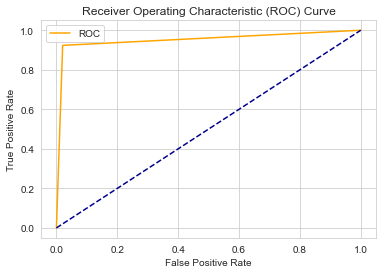

In [47]:
plot_roc_curve(FPR,TPR)

As our ROC Curve tends more towards True Positive Rate 1.0, it depicts that our Model is performing Well in the Classification of Email as Spam or Not a Spam